Principal Component Analysis in Python

In [1]:
# load libraries and modules
import pandas as pd 
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# laod breast cancer dataset
breast_cancer = load_breast_cancer() # dictionary-like objects with different data elements
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# Data Elements of the breast cancer 
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# check the dimension of the data where each row represents a sample and each column represents a measurement
breast_cancer.data.shape

(569, 30)

In [5]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
#breast_cancer.data_module
#breast_cancer.DESCR
#breast_cancer.filename
breast_cancer.feature_names
#breast_cancer.target

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# convert this data into DataFrame
# we are only interested in mean measurements which are stored in the first 10 columns of the measurement dbreast_cancer
# therefore, only extract first 10 columns
df = pd.DataFrame(data=breast_cancer.data[:, :10],  # create a DataFrame df
                 columns=breast_cancer.feature_names[:10])
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243


In [9]:
# Standardize Data
# It is a crucial step before performing PCA. To standardize the data, we need to create a sStandardScaler object
scalar = StandardScaler() # create a scalar
data_scaled = scalar.fit_transform(df) # Fit scalar
data_scaled
# It returns the numpy array, therefore, needs to return it back to pandas DataFrame

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [10]:
# Print standardized Data in DataFrame Format
df_scaled = pd.DataFrame(data=data_scaled,      # create DataFrame df_scaled
                         columns=breast_cancer.feature_names[:10])
df_scaled.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096


In [11]:
# Ideal number of components 
pca = PCA(n_components=10)                # create a PCA object forming 10 PCs
pca_trans = pca.fit_transform(df_scaled)  # Transform data
print(pca_trans)                          # Print transformed data
print(pca_trans.shape)                    # Print dimensions of transformed data

[[ 5.22415459e+00  3.20442816e+00 -2.17133953e+00 ... -2.31931776e-01
  -2.19820527e-02 -1.12576612e-02]
 [ 1.72809379e+00 -2.54083911e+00 -1.01967851e+00 ... -8.34286829e-03
  -5.61712691e-02 -2.29922105e-02]
 [ 3.96975705e+00 -5.50074878e-01 -3.23568755e-01 ... -3.55050077e-01
   2.01158676e-02 -2.26748120e-02]
 ...
 [ 6.49583280e-01 -2.04178350e+00  1.71096620e+00 ...  1.89068279e-02
  -4.71287912e-02  5.92649756e-04]
 [ 6.90566407e+00  1.21624274e+00  1.64012034e+00 ...  2.23487192e-01
   4.15622728e-03 -1.81335473e-02]
 [-3.97083348e+00 -9.89971170e-01  2.15827670e+00 ... -5.27613923e-01
   4.44687117e-01 -2.93250285e-02]]
(569, 10)


In [12]:
# eigenvalues = pca.explained_variance_
prop_var = pca.explained_variance_   # Extract proportion of explained variance
print(prop_var)                            # Print 

[5.48823339e+00 2.52314794e+00 8.82165558e-01 4.99887973e-01
 3.73195069e-01 1.24360308e-01 8.02263057e-02 3.49512185e-02
 1.11550653e-02 2.82802905e-04]


In [13]:
# +1 is to start the array from 1 instead of 0
PC_number = np.arange(pca.n_components) +1  # Enumerate the components number
print(PC_number)

[ 1  2  3  4  5  6  7  8  9 10]


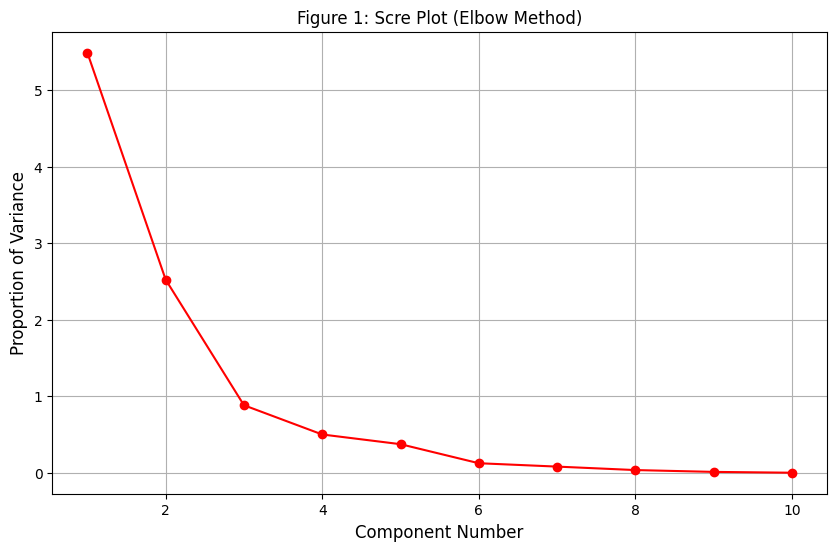

In [14]:
# Scre Plot
plt.figure(figsize=(10,6))                   # Set a figure and size
plt.plot(PC_number,prop_var,'ro-')           # Plotting prop var
plt.title('Figure 1: Scre Plot (Elbow Method)',fontsize =12) #Annotations
plt.xlabel('Component Number',fontsize=12)
plt.ylabel('Proportion of Variance',fontsize=12)
plt.grid()                                   # gridlines
plt.show()                                   # print

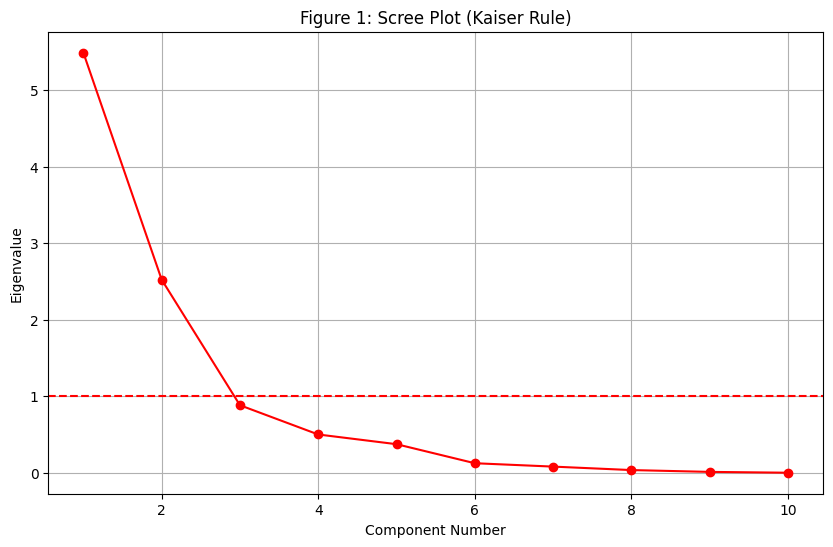

In [15]:
#Alternative Scree Plot
PC_number = np.arange(pca.n_components_) + 1   # Data 
eigenvalues = pca.explained_variance_          # Extract explained variance

plt.figure(figsize=(10,6))                     # Set a figure and size
plt.plot(PC_number,eigenvalues,'ro-')          # Plotting eigenvalues
plt.title('Figure 1: Scree Plot (Kaiser Rule)',fontsize=12)  # Annotations
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue',fontsize = 10)

plt.axhline(y = 1,color = 'r',linestyle = '--') # Horizontal line to show the threshold
             
plt.grid()                                  # Grid lines
plt.show()                                  # Print

In [16]:
# Perform PCA forming 2 PCs
pca = PCA(n_components=2)            # Create PCA object forming 2 components
PC = pca.fit_transform(df_scaled)    # Transform data
print(PC)
print(PC.shape)

[[ 5.22415459  3.20442816]
 [ 1.72809379 -2.54083911]
 [ 3.96975705 -0.55007488]
 ...
 [ 0.64958328 -2.0417835 ]
 [ 6.90566407  1.21624274]
 [-3.97083348 -0.98997117]]
(569, 2)


In [17]:
# Transformed Data as pandas dataframe
df_PC = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
df_PC.head(10)

,PC1,PC2
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072
5,1.381320,3.314411
6,1.601857,-1.498730
7,1.256866,2.494573
8,2.390449,3.274808
9,2.444686,3.626038


In [18]:
# Biplot Data
PC1 = PC[:,0] # Extract PC1
PC2 = PC[:,1] # Extract PC2

PC1
PC2

array([ 3.20442816e+00, -2.54083911e+00, -5.50074878e-01,  6.90506975e+00,
       -1.35807235e+00,  3.31441144e+00, -1.49872981e+00,  2.49457276e+00,
        3.27480830e+00,  3.62603766e+00, -2.08235900e+00, -3.00849771e-01,
        1.40973931e+00, -1.63677105e+00,  2.72861324e+00,  1.81106706e+00,
       -8.45313752e-01,  2.00901111e+00, -2.46766211e+00, -7.14011871e-02,
        1.41991267e+00,  1.75057093e+00,  2.48926186e+00, -2.84058679e+00,
        3.12952405e-01,  3.34539255e+00,  1.69400768e+00, -1.75202713e+00,
        6.45267915e-01, -7.59386892e-01, -1.51429828e-02,  3.16189330e+00,
        9.04176514e-01, -1.14592812e+00,  5.47493730e-01, -9.00137995e-01,
        1.73005857e-02, -1.05951625e+00, -1.74683482e+00,  4.00256149e-01,
       -1.19274866e+00,  2.14796167e+00, -1.35462460e-01,  1.25099372e+00,
        2.79231049e-02, -2.78225444e-01,  9.74939472e-01,  1.80933535e+00,
        4.01971124e-01, -8.12088774e-01, -8.75306842e-01, -1.48571643e+00,
       -2.28639609e-01,  

In [19]:
loadings =pca.components_  # Extract loadings
print(loadings)            
print(loadings.shape)      # check dimensions

[[ 0.36393793  0.15445113  0.37604434  0.36408585  0.23248053  0.36444206
   0.39574849  0.4180384   0.21523797  0.07183744]
 [-0.31392907 -0.14718091 -0.28465789 -0.30484171  0.40196232  0.26601315
   0.10428597  0.0071836   0.36830091  0.5717677 ]]
(2, 10)


In [20]:
"""Need to create a scaling factor for the values of the components since the range of these values is quite different than 
the loadings range which is a problem in representing the two types of data in the same graph"""
scalePC1 = 1.0/(PC1.max() - PC1.min()) # Create min-max scale for PC1
print(scalePC1)
scalePC2 = 1.0/(PC2.max() - PC2.min()) # Create min-max scale for PC2
print(scalePC2)

0.0743533896535182
0.09109586040689009


In [21]:
# Extract features names that stores variable names to use labeling the loadings vectors
features = breast_cancer.feature_names[:10] # features/variable names
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension']


Text(0.5, 1.0, 'Simple Biplot')

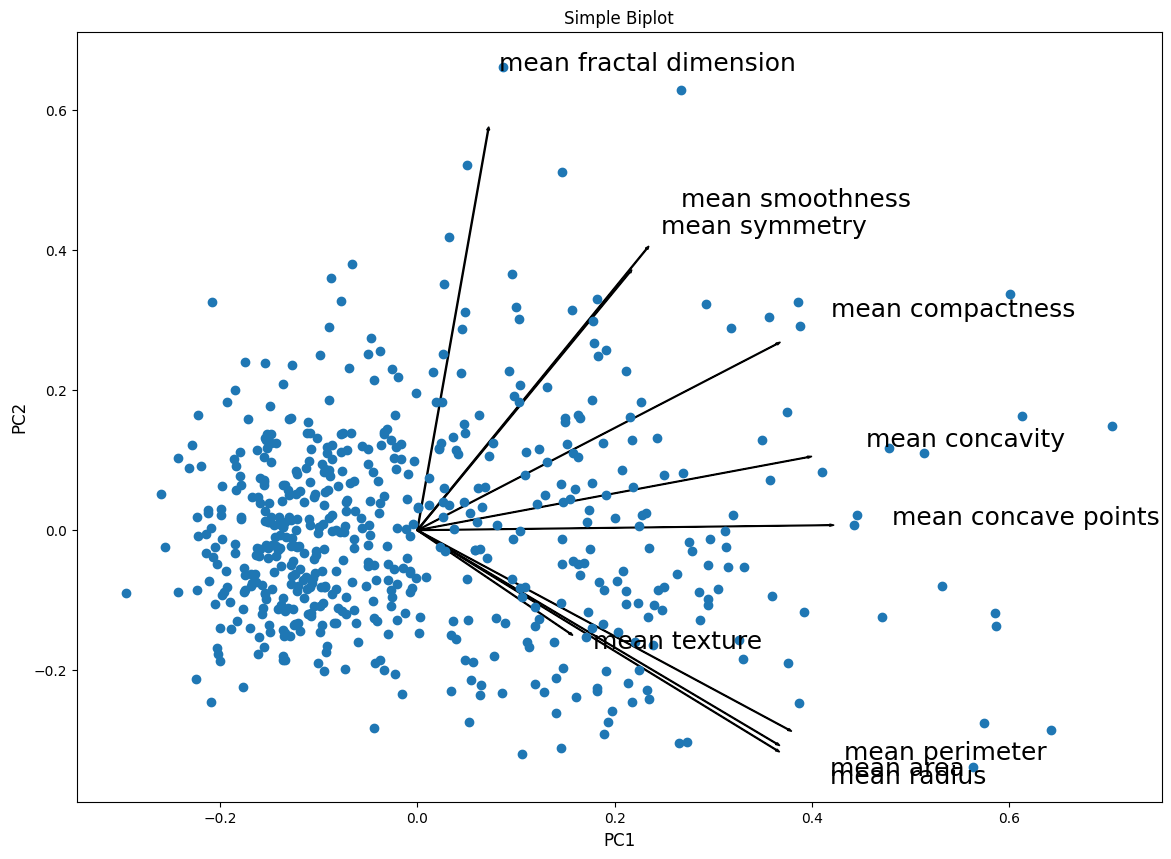

In [22]:
# Simple Biplot 
fig, ax = plt.subplots(figsize=(14,10))   # Set figure size
 
for i, feature in enumerate(features):    # Iteratation over features/variables
    ax.arrow(0,                           # Plotting arrows
             0, 
             loadings[0, i], 
             loadings[1, i])
    ax.text(loadings[0, i] * 1.15,        # Plotting arrow texts
            loadings[1, i] * 1.15, 
            feature, 
            fontsize = 18)
 
ax.scatter(PC1 * scalePC1,PC2 * scalePC2) # Plotting data points
           
ax.set_xlabel('PC1',fontsize = 12)        # Annotations
              
ax.set_ylabel('PC2',fontsize = 12)
ax.set_title('Simple Biplot',fontsize = 12)

Text(0.5, 1.0, 'Simple Biplot')

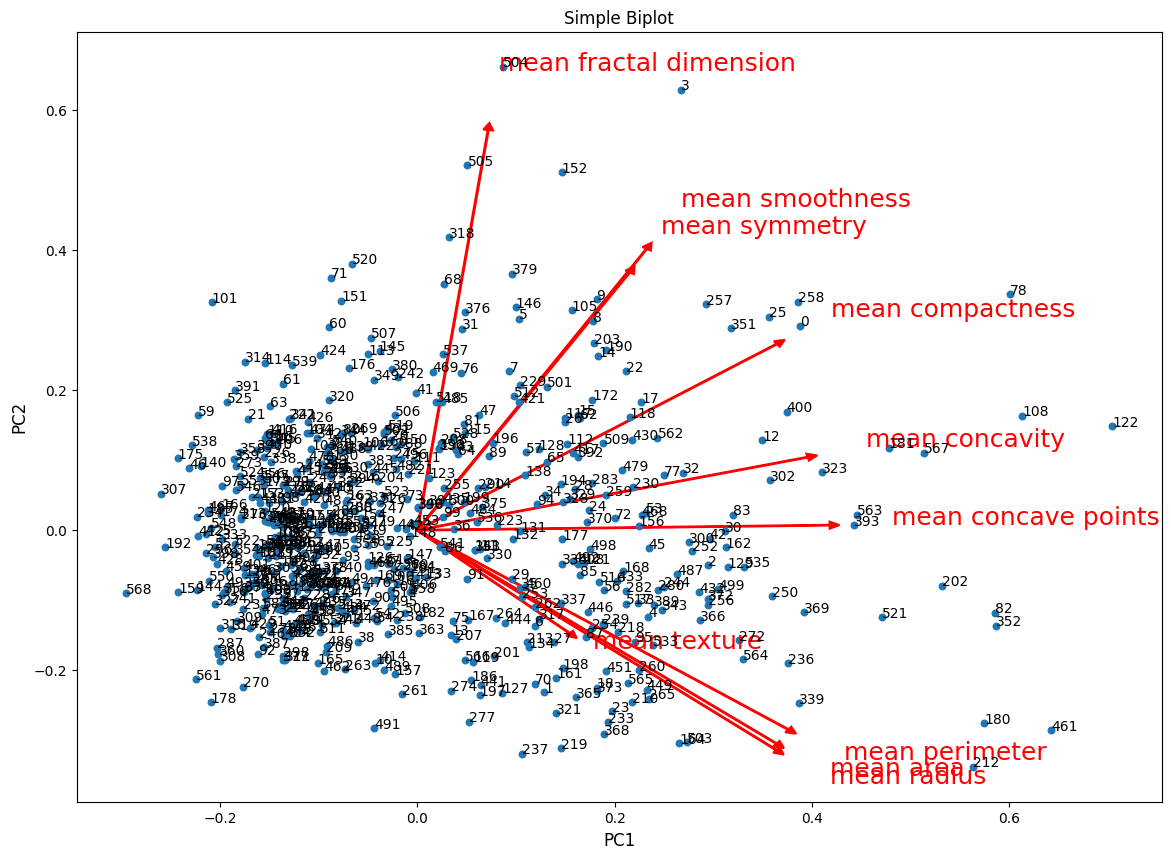

In [23]:
#Biplot with customized arrows
fig, ax = plt.subplots(figsize=(14,10))   # Set figure size
 
for i, feature in enumerate(features):    # Iteratation over features/variables
    ax.arrow(0,                           # Plotting arrows
             0, 
             loadings[0, i],
             loadings[1, i],
             head_width = 0.01,
             head_length = 0.01,
             color='red',
             linewidth = 1.5)
    ax.text(loadings[0, i] * 1.15,        # Plotting arrow texts
            loadings[1, i] * 1.15, 
            feature,
            color='red',
            fontsize = 18)
 
ax.scatter(PC1 * scalePC1,                # Plotting data points
           PC2 * scalePC2,
           s=22) 
for i, label in enumerate(df.index):      # Label data points
    ax.text(PC1[i]*scalePC1,
            PC2[i]*scalePC2,
            str(label),
            fontsize=10)

ax.set_xlabel('PC1',fontsize = 12)        # Annotations
              
ax.set_ylabel('PC2',fontsize = 12)
ax.set_title('Simple Biplot',fontsize = 12)

In [24]:
# New Biplot Data 
groups = breast_cancer.target     # extract data groups
print(groups)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

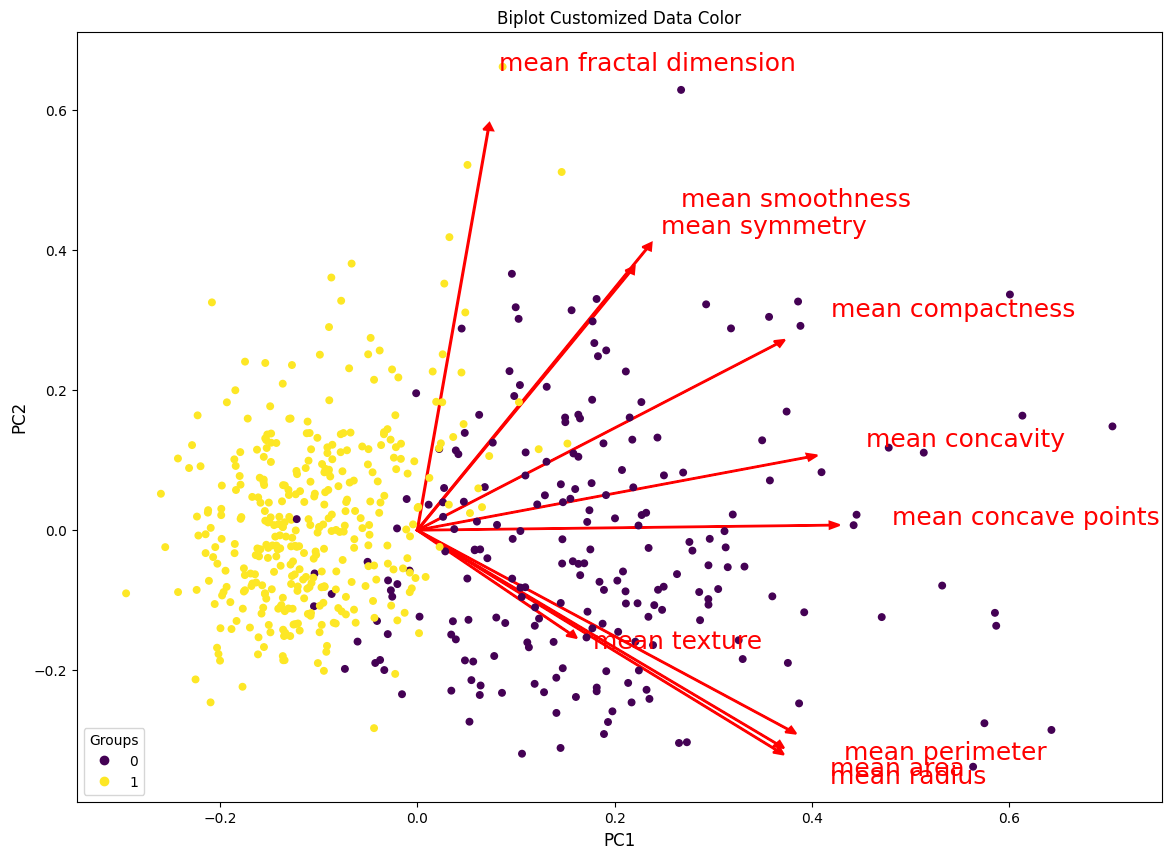

In [25]:
# Biplot with Customized Data Color 
#Biplot with customized arrows
fig, ax = plt.subplots(figsize=(14,10))   # Set figure size
 
for i, feature in enumerate(features):    # Iteratation over features/variables
    ax.arrow(0,                           # Plotting arrows
             0, 
             loadings[0, i],
             loadings[1, i],
             head_width = 0.01,
             head_length = 0.01,
             color='red',
             linewidth = 1.5)
    ax.text(loadings[0, i] * 1.15,        # Plotting arrow texts
            loadings[1, i] * 1.15, 
            feature,
            color='red',
            fontsize = 18)
 
scatter = ax.scatter(PC1 * scalePC1,     # Plotting data points
                     PC2 * scalePC2,
                     c=groups,
                     cmap='viridis',
                     s=22) 

ax.set_xlabel('PC1',fontsize = 12)        # Annotations
              
ax.set_ylabel('PC2',fontsize = 12)
ax.set_title('Biplot Customized Data Color',fontsize = 12)
ax.legend(*scatter.legend_elements(),
          loc='lower left',
          title='Groups')

In [30]:
# New Biplot Data to create more informative legends for groups like Malignant or benign
df_PC = pd.DataFrame(data=PC,               # Transformed data as pandas dataframe
                     columns=['PC1','PC2'])
df_PC["group"] = breast_cancer.target      # Target data added to df_PC
df_PC.head(10)

,PC1,PC2,group
0,5.224155,3.204428,0
1,1.728094,-2.540839,0
2,3.969757,-0.550075,0
3,3.596713,6.905070,0
4,3.151092,-1.358072,0
5,1.381320,3.314411,0
6,1.601857,-1.498730,0
7,1.256866,2.494573,0
8,2.390449,3.274808,0
9,2.444686,3.626038,0


In [31]:
mal_PC1 = df_PC.loc[df_PC["group"]==0,'PC1']    # subsetting each groups component pairs
mal_PC2 = df_PC.loc[df_PC["group"]==0,'PC2']

ben_PC1 = df_PC.loc[df_PC["group"]==1,'PC1']
ben_PC2 = df_PC.loc[df_PC["group"]==1,'PC2']

In [32]:
scalePC1_mal = 1.0/(mal_PC1.max() - mal_PC1.min())    # New data scaling
scalePC2_mal = 1.0/(mal_PC2.max() - mal_PC2.min())

scalePC1_ben = 1.0/(ben_PC1.max() - ben_PC1.min())
scalePC2_ben = 1.0/(ben_PC2.max() - ben_PC2.min())

AttributeError: 'tuple' object has no attribute 'arrow'

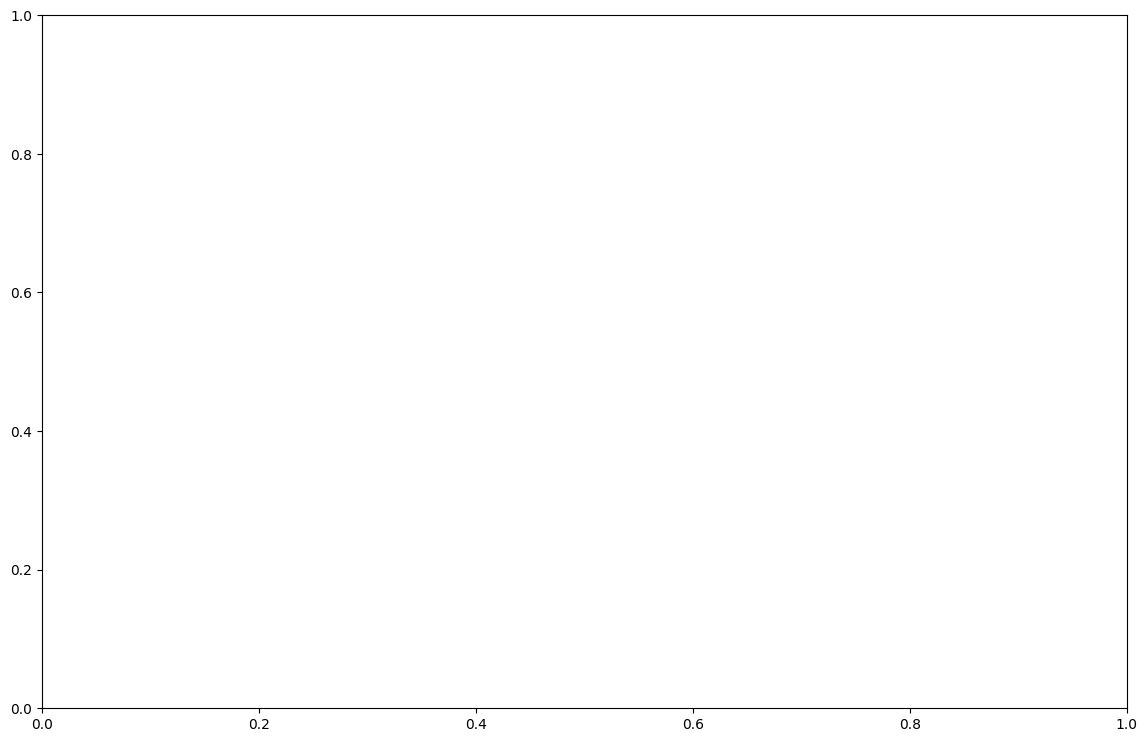

In [42]:
# Biplot with customized data color and legend 
# Biplot with Customized Data Color 
#Biplot with customized arrows
fig, ax = plt.subplots(figsize=(14,9))   # Set figure size
 
for i, feature in enumerate(features):    # Iteratation over features/variables
    ax.arrow(0,                           # Plotting arrows
             0, 
             loadings[0, i],
             loadings[1, i],
             head_width = 0.01,
             head_length = 0.01,
             color='red',
             linewidth = 1.5)
    ax.text(loadings[0, i] * 1.15,        # Plotting arrow texts
            loadings[1, i] * 1.15, 
            feature,
            color='blue',
            fontsize = 15)
    
ax.scatter(mal_PC1 * scalePC1_mal,       # Plotting Malignant Groups
                     mal_PC2 * scalePC2_mal,
                     c="#440154",
                     label="Malignant") 
    
ax.scatter(ben_PC1*scalePC1_ben,         # Plot Benign Groups
               ben_PC2*scalePC2_ben,
               c="#FDE724",
               label="Benign")

ax.set_xlabel('PC1',fontsize = 12)          # Annotations   
ax.set_ylabel('PC2',fontsize = 12)

ax.set_title('Biplot (Customized Data Color)',fontsize = 12)
ax.legend(loc='lower left',title='Groups')
plt.savefig("PCA Biplot Python.png",dpi=300)